# ANN - cat or dog?

Construction of a Convolutional Neural Network for Classifying Images of Dogs and Cats

In [142]:

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import pandas as pd

In [143]:
# data direction
data_dir = './input/train' 
test_dir = './input/test'
img_size = 150 # We will feed images of size 128x128 to the network (input images have various sizes)
batch_size = 32 # Number of images per training step

In [144]:
# Splitting into training and validation sets, and specifying image rescaling and batch size
# We allocate 10% of the training set as the validation set
train = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset="training",
    seed=0,
    label_mode='binary',
    image_size=(img_size, img_size),
    batch_size=batch_size,
    color_mode='rgb'
)
val = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset="validation",
    seed=0,
    label_mode='binary',
    image_size=(img_size, img_size),
    batch_size=batch_size,
    color_mode='rgb'
)

test = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_size, img_size),
    batch_size=batch_size,
    color_mode='rgb',
    labels=None,
    shuffle = False
)

Found 18737 files belonging to 2 classes.
Using 16864 files for training.
Found 18737 files belonging to 2 classes.
Using 1873 files for validation.
Found 4685 files.


In [145]:
# We will save the weights of the model that achieved the best performance on the validation set
checkpoint_filepath = './checkpoint.weights.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

This is a binary classification problem, so:
* The last layer must contain only one neuron with a sigmoid activation function.
* The cost function is binary_crossentrop
* Ae accuracy as an additional metrc.


In [147]:

model = tf.keras.models.Sequential()
# normalization to the range <0, 1>
model.add(tf.keras.layers.Rescaling(1/255, input_shape=(img_size, img_size, 3)))


model.add(tf.keras.layers.Conv2D(32, (3, 3), input_shape=(img_size, img_size, 3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(32, (3, 3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(64, (3, 3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


C:\Users\Zuzanna\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Zuzanna\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [148]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)         │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 148, 148, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 72, 72, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 72, 72, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │     1,183,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,212,513 (4.63 MB)

 Trainable params: 1,212,513 (4.63 MB)

 Non-trainable params: 0 (0.00 B)

In [149]:
history = model.fit(train, epochs=10, validation_data=val, callbacks=[model_checkpoint_callback])

Epoch 1/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 34s 62ms/step - accuracy: 0.5806 - loss: 0.6675 - val_accuracy: 0.7411 - val_loss: 0.5332
Epoch 2/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 32s 60ms/step - accuracy: 0.7325 - loss: 0.5362 - val_accuracy: 0.7710 - val_loss: 0.4882
Epoch 3/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 32s 61ms/step - accuracy: 0.7867 - loss: 0.4743 - val_accuracy: 0.8121 - val_loss: 0.4281
Epoch 4/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 32s 60ms/step - accuracy: 0.8031 - loss: 0.4345 - val_accuracy: 0.8003 - val_loss: 0.4683
Epoch 5/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 32s 60ms/step - accuracy: 0.8236 - loss: 0.4001 - val_accuracy: 0.8238 - val_loss: 0.4091
Epoch 6/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 31s 59ms/step - accuracy: 0.8488 - loss: 0.3595 - val_accuracy: 0.8457 - val_loss: 0.3797
Epoch 7/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 32s 60ms/step - accuracy: 0.8566 - loss: 0.3302 - val_accuracy: 0.8441 - val_loss: 0.3966
Epoch 8/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 32s 60ms/step - accuracy: 0.8819 - loss: 0.2873 - 

In [150]:
# Loading the weights of the best model.
model.load_weights(checkpoint_filepath)

In [151]:
# Evaluation on the training set.
model.evaluate(train)

527/527 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9349 - loss: 0.1691


[0.14723795652389526, 0.9447343349456787]

In [152]:
model.evaluate(val)

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8634 - loss: 0.4192


[0.44941088557243347, 0.8515750169754028]

In [153]:
# Determining the model predictions for the test set
preds = model.predict(test) 
# Class 1 for predictions >= 0.5, for others class 0
preds = preds >= 0.5

# Preparing the output file
preds = list(preds)
# Combining predictions with the file names from the test set
# test.file_paths - file names from the test set
# f.split('/')[-1] splits the file path by '/' and takes the last element of the list (the file name)
df_result = pd.DataFrame(list(zip([f.split('/')[-1] for f in test.file_paths], preds)),
                         columns=['file', 'label'])
# Converting True/False to 0 and 1
df_result['label'] = df_result['label'].astype(int)
df_result.head()

147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step


,file,label
0,test\0.jpg,0
1,test\1.jpg,0
2,test\10.jpg,0
3,test\100.jpg,1
4,test\1000.jpg,1


In [154]:
# Saving the file
df_result.to_csv('submission.csv', sep=',', index=False)

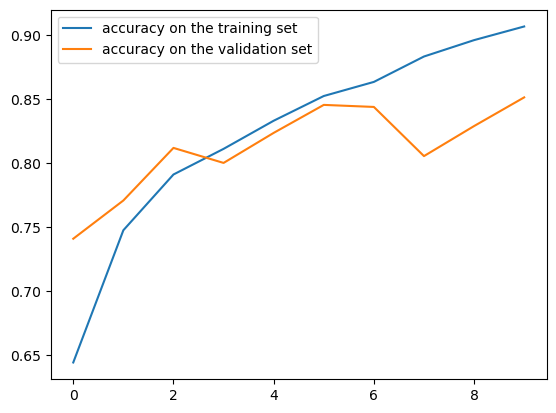

In [155]:
# Displaying the training progress (accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy on the training set', 'accuracy on the validation set']);

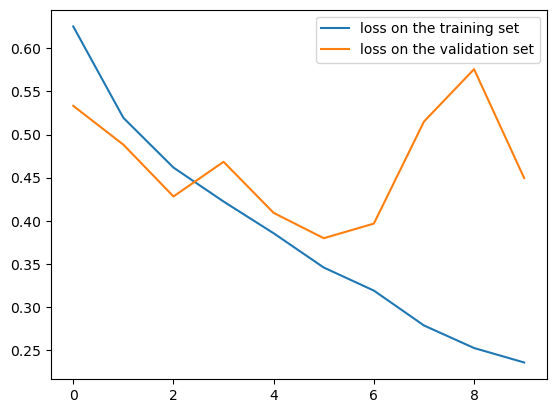

In [156]:
# displaying the learning process (loss function)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss on the training set', 'loss on the validation set']);

In [157]:
# save
model.save('./model7.h5')

In [158]:
# read
model = tf.keras.models.load_model('./model7.h5')

### Prediction for a Selected Image

In [160]:
path = './input/train/Dog/100.jpg' 

In [161]:
image = tf.keras.preprocessing.image.load_img(path, target_size=(img_size, img_size))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr_batch = np.array([input_arr])
predictions = model.predict(input_arr_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


In [162]:
# 0 - cat
# 1 - dog
predictions

array([[0.9671839]], dtype=float32)

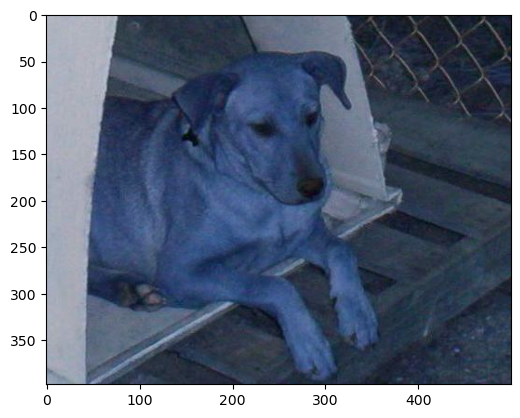

In [163]:
img = cv2.imread(path)
plt.imshow(img)
plt.show()